In [1]:
import math
import numpy as np

In [2]:
import ellipsefns
#getfocus, getsemiminor, theoreticalx, theoreticaly

In [3]:
import initdat

In [4]:
delta=0.005 #with dtmin=0.001, accuracy of 1e-6 appears to be too much to ask. try 0.05
rad0=50
ecc0=1.6
theta0= 0. #math.pi/6. #math.pi/6.
mass0=1.0
initdateqhyperb=initdat.InitialDataEqualMassConic(rad0,ecc0,theta0,mass0)
print(initdateqhyperb)

angle 0.0
1.6
(array([3.14159265, 0.        ]), 0.0, 50, 1.6, array([1., 1.]))


In [5]:
import getxyuvtwohyperb_apper

In [6]:
useperihelion=True

In [7]:
xyuvaeqhyperb=getxyuvtwohyperb_apper.getxyuveqtwohyperbolas(initdateqhyperb,useperihelion)
print(xyuvaeqhyperb)
masses,xvec,avec=xyuvaeqhyperb

initdat 50 [3.14159265 0.        ] 1.6 [-1.  1.] [1.2246468e-16 0.0000000e+00]
coordsep 50
pi
zero
[-50.  50.]
[0. 0.]
(array([1., 1.]), array([[-30.        ,   0.        ,   0.        ,  -0.        ,
         -0.16329932,   0.        ],
       [ 30.        ,   0.        ,   0.        ,  -0.        ,
          0.16329932,   0.        ]]), array([[ 0.00027778, -0.        ,  0.        ],
       [-0.00027778, -0.        ,  0.        ]]))


In [8]:
import RK4implicit

In [9]:
def RK4implicit(h,t,xvec,f): #not a finite difference so no step in y
    k1= h*f(t,xvec)
    k2=h*f(t+h/2, xvec+k1/2)
    k3=h*f(t+h/2,xvec+k2/2)
    k4=h*f(t+h,xvec+k3)
    return t+h, xvec+1/6.*(k1+2.*k2+2.*k3+k4)

In [10]:
import OrbitDiffEqAdaptive

In [11]:
masses, xvec,avec=xyuvaeqhyperb
ODEeq= OrbitDiffEqAdaptive.OrbitDiffEqAdaptive(masses,xvec,avec,0.0, delta)
ODEeq.print2D()
ODEeq.print2D()

[1. 1.] [[-30.           0.           0.          -0.          -0.16329932
    0.        ]
 [ 30.           0.           0.          -0.           0.16329932
    0.        ]] 0.0
[1. 1.] [[-30.           0.           0.          -0.          -0.16329932
    0.        ]
 [ 30.           0.           0.          -0.           0.16329932
    0.        ]] 0.0


In [12]:
print(xyuvaeqhyperb)

(array([1., 1.]), array([[-30.        ,   0.        ,   0.        ,  -0.        ,
         -0.16329932,   0.        ],
       [ 30.        ,   0.        ,   0.        ,  -0.        ,
          0.16329932,   0.        ]]), array([[ 0.00027778, -0.        ,  0.        ],
       [-0.00027778, -0.        ,  0.        ]]))


In [13]:
import timestepAdaptive

In [14]:
import parabfns

In [15]:
import hyperbfns

In [16]:
numsteps=5000 #50000

#numsteps=6000*10

dt=.01
dtmax=1
dtmin = 0.001
outputevery=1
nptimes, npstar1x, npstar2x, npstar1a, npstar2a,nperr,npdt= timestepAdaptive.timestepAdaptive(numsteps,dt,dtmax,dtmin,xyuvaeqhyperb,outputevery,delta)

0.01
[-4.16666666e-08  1.63299316e-03  0.00000000e+00]
[1.73611110e-15 2.66666666e-06 0.00000000e+00]
2.6666666626414583e-06
0.0016329931606229888
91.85586542369523 False
0.027862445548662344
[-4.00860618e-07  4.54991825e-03  0.00000000e+00]
[1.60689235e-13 2.07017561e-05 0.00000000e+00]
2.0701756219474445e-05
0.0045499182651421825
32.967625187726874 False
0.060087434011615294
[-2.13633479e-06  9.81223613e-03  0.00000000e+00]
[4.56392632e-12 9.62799778e-05 0.00000000e+00]
9.627998238714234e-05
0.009812236360134338
15.28703493216162 False
0.10693182577739817
[-7.67376665e-06  1.74618886e-02  0.00000000e+00]
[5.88866946e-11 3.04917552e-04 0.00000000e+00]
0.00030491761080130394
0.01746189024136001
8.590135313341502 False
0.1647591310551003
[-2.06873067e-05  2.69050277e-02  0.00000000e+00]
[4.27964660e-10 7.23880516e-04 0.00000000e+00]
0.0007238809437416473
0.02690503565769143
5.575164512265532 False
0.2278538777304829
[-4.50275543e-05  3.72082945e-02  0.00000000e+00]
[2.02748065e-09 1.384

0.6100914421600168
[-0.01065375  0.09774794  0.        ]
[0.0001135  0.00955466 0.        ]
0.009668162215858657
0.09832681331080885
1.5255248792193983 False
0.6102281898511249
[-0.01074532  0.09773722  0.        ]
[0.00011546 0.00955256 0.        ]
0.009668025337997568
0.09832611727307027
1.5255356782107194 False
0.6103660483638632
[-0.01083674  0.09772643  0.        ]
[0.00011743 0.00955045 0.        ]
0.009667889156363248
0.09832542477082541
1.5255464225007567 False
0.6105050129568315
[-0.010928    0.09771557  0.        ]
[0.00011942 0.00954833 0.        ]
0.00966775367417054
0.09832473582049707
1.5255571118323874 False
0.6106450788640556
[-0.01101911  0.09770465  0.        ]
[0.00012142 0.0095462  0.        ]
0.00966761889456373
0.0983240504381493
1.5255677459540524 False
0.6107862412954218
[-0.01111006  0.09769366  0.        ]
[0.00012343 0.00954405 0.        ]
0.009667484820612826
0.09832336863946854
1.52557832462005 False
0.6109284954371419
[-0.01120086  0.09768261  0.        ]


1.5264157434802612 False
0.6341488816871145
[-0.02070883  0.09606237  0.        ]
[0.00042886 0.00922798 0.        ]
0.00965683463398406
0.09826919473560398
1.5264193464043252 False
0.6343839778535766
[-0.02077711  0.09604739  0.        ]
[0.00043169 0.0092251  0.        ]
0.009656789695515478
0.09826896608551185
1.5264228980436485 False
0.6346195303307473
[-0.02084519  0.09603241  0.        ]
[0.00043452 0.00922222 0.        ]
0.009656745403480178
0.09826874072399716
1.52642639861742 False
0.6348555342516249
[-0.02091308  0.09601742  0.        ]
[0.00043736 0.00921934 0.        ]
0.009656701755072952
0.09826851863680938
1.5264298483462948 False
0.6350919847652461
[-0.02098077  0.09600243  0.        ]
[0.00044019 0.00921647 0.        ]
0.009656658747475075
0.09826829980962871
1.526433247452017 False
0.6353288770368054
[-0.02104827  0.09598743  0.        ]
[0.00044303 0.00921359 0.        ]
0.009656616377850091
0.09826808422804471
1.5264365961577535 False
0.6355662062478097
[-0.02111557

0.665442077763288
[-0.02776741  0.09425618  0.        ]
[0.00077103 0.00888423 0.        ]
0.00965525620050809
0.0982611632360827
1.5265441102056705 False
0.6657023774751122
[-0.02781373  0.09424258  0.        ]
[0.0007736  0.00888166 0.        ]
0.009655268435655158
0.09826122549436862
1.5265431429877345 False
0.6659626735193952
[-0.0278599   0.09422901  0.        ]
[0.00077617 0.00887911 0.        ]
0.009655280951688518
0.09826128918189767
1.526542153566961 False
0.6662229633896835
[-0.02790591  0.09421546  0.        ]
[0.00077874 0.00887655 0.        ]
0.00965529374609464
0.09826135428587701
1.526541142142179 False
0.6664832445974037
[-0.02795178  0.09420194  0.        ]
[0.0007813  0.00887401 0.        ]
0.00965530681637349
0.09826142079358252
1.5265401089111519 False
0.6667435146717895
[-0.02799749  0.09418843  0.        ]
[0.00078386 0.00887146 0.        ]
0.009655320160039081
0.09826148869236147
1.5265390540705346 False
0.6670037711598025
[-0.02804305  0.09417495  0.        ]
[0

0.6985371375838558
[-0.03266825  0.09268888  0.        ]
[0.00106721 0.00859123 0.        ]
0.009658442761419934
0.0982773766510886
1.5262922669633396 False
0.6987815594970017
[-0.03269837  0.09267843  0.        ]
[0.00106918 0.00858929 0.        ]
0.00965847480544982
0.0982775396794701
1.526289735062777 False
0.6990257770384478
[-0.03272839  0.092668    0.        ]
[0.00107115 0.00858736 0.        ]
0.00965850690391047
0.09827770298450443
1.5262871988740996 False
0.6992697894425397
[-0.03275832  0.0926576   0.        ]
[0.00107311 0.00858543 0.        ]
0.009658539055753812
0.098277866560858
1.5262846584801812 False
0.6995135959525894
[-0.03278815  0.09264723  0.        ]
[0.00107506 0.00858351 0.        ]
0.009658571259944801
0.09827803040326358
1.5262821139628664 False
0.6997571958207757
[-0.03281788  0.09263687  0.        ]
[0.00107701 0.00858159 0.        ]
0.009658603515453463
0.09827819450647973
1.5262795654035963 False
0.7000005883081164
[-0.03284751  0.09262654  0.        ]
[0

0.09829874619256515
1.5259604604330679 False
0.7277668238984003
[-0.0358119   0.09154335  0.        ]
[0.00128249 0.00838018 0.        ]
0.009662676514777155
0.09829891410782296
1.5259578537710672 False
0.7279815924785207
[-0.03583198  0.09153567  0.        ]
[0.00128393 0.00837878 0.        ]
0.00966270950230892
0.09829908189962366
1.52595524903447 False
0.7281961136889444
[-0.035852    0.09152801  0.        ]
[0.00128537 0.00837738 0.        ]
0.00966274246531831
0.09829924956640468
1.525952646247514 False
0.7284103875057947
[-0.03587196  0.09152037  0.        ]
[0.0012868  0.00837598 0.        ]
0.009662775403508383
0.09829941710665625
1.5259500454336152 False
0.7286244139085056
[-0.03589185  0.09151275  0.        ]
[0.00128823 0.00837458 0.        ]
0.009662808316578281
0.09829958451884871
1.5259474466164997 False
0.7288381928798631
[-0.03591169  0.09150515  0.        ]
[0.00128965 0.00837319 0.        ]
0.009662841204235663
0.09829975180149574
1.5259448498192199 False
0.7290517244

0.7534512489688298
[-0.03796141  0.09069502  0.        ]
[0.00144107 0.00822559 0.        ]
0.0096666557876617
0.09831915270008026
1.5256437416377118 False
0.753634809039792
[-0.0379751   0.09068945  0.        ]
[0.00144211 0.00822458 0.        ]
0.009666684080331658
0.09831929658175784
1.5256415089917454 False
0.7538181380437462
[-0.03798875  0.09068389  0.        ]
[0.00144315 0.00822357 0.        ]
0.009666712330397018
0.0983194402465607
1.525639279717595 False
0.7540012362065249
[-0.03800236  0.09067834  0.        ]
[0.00144418 0.00822256 0.        ]
0.00966674053782352
0.09831958369431555
1.52563705381792 False
0.7541841037549021
[-0.03801593  0.0906728   0.        ]
[0.00144521 0.00822156 0.        ]
0.009666768702586538
0.09831972692489813
1.5256348312946193 False
0.7543667409164991
[-0.03802947  0.09066728  0.        ]
[0.00144624 0.00822056 0.        ]
0.009666796824661945
0.09831986993818669
1.5256326121495523 False
0.7545491479197792
[-0.03804296  0.09066178  0.        ]
[0.

0.7749965581332434
[-0.03942898  0.09008476  0.        ]
[0.00155464 0.00811526 0.        ]
0.009669907654395283
0.09833568860996135
1.5253871927918252 False
0.7751527767793268
[-0.03943866  0.09008065  0.        ]
[0.00155541 0.00811452 0.        ]
0.009669930583715972
0.09833580519686597
1.525385384293173 False
0.7753087971132783
[-0.03944831  0.09007655  0.        ]
[0.00155617 0.00811378 0.        ]
0.009669953472779658
0.09833592157894112
1.525383578976117 False
0.7754646194067712
[-0.03945794  0.09007246  0.        ]
[0.00155693 0.00811305 0.        ]
0.009669976321639098
0.09833603775645579
1.5253817768364626 False
0.7756202439314217
[-0.03946755  0.09006837  0.        ]
[0.00155769 0.00811231 0.        ]
0.009669999130331012
0.09833615372959739
1.5253799778712793 False
0.7757756709589474
[-0.03947712  0.0900643   0.        ]
[0.00155844 0.00811158 0.        ]
0.009670021898912001
0.09833626949865447
1.5253781820760695 False
0.7759309007609672
[-0.03948668  0.09006024  0.       

1.5251772470304406 False
0.7938709947251552
[-0.04050906  0.08961922  0.        ]
[0.00164098 0.0080316  0.        ]
0.009672588181919342
0.09834931714007648
1.5251758157746915 False
0.7940035087700504
[-0.04051604  0.08961616  0.        ]
[0.00164155 0.00803106 0.        ]
0.009672606302872696
0.09834940926549939
1.5251743871187586 False
0.7941358589644087
[-0.040523    0.08961312  0.        ]
[0.00164211 0.00803051 0.        ]
0.009672624390963742
0.09834950122376697
1.5251729610576943 False
0.7942680455565855
[-0.04052994  0.08961008  0.        ]
[0.00164268 0.00802997 0.        ]
0.009672642446245015
0.09834959301514681
1.525171537587334 False
0.7944000687947199
[-0.04053687  0.08960705  0.        ]
[0.00164324 0.00802942 0.        ]
0.009672660468779968
0.09834968463996195
1.5251701167026541 False
0.7945319289266214
[-0.04054378  0.08960402  0.        ]
[0.0016438  0.00802888 0.        ]
0.00967267845862714
0.09834977609851046
1.5251686983990174 False
0.7946636261998193
[-0.040550

0.8094690113510413
[-0.04127712  0.08927959  0.        ]
[0.0017038  0.00797085 0.        ]
0.00967464589235259
0.09835977781772684
1.5250136115391502 False
0.8095826025929257
[-0.04128233  0.08927726  0.        ]
[0.00170423 0.00797043 0.        ]
0.009674660297969739
0.09835985104690703
1.5250124761623132 False
0.8096960590695452
[-0.04128753  0.08927494  0.        ]
[0.00170466 0.00797001 0.        ]
0.009674674677829018
0.0983599241450959
1.5250113428181087 False
0.8098093809895055
[-0.04129273  0.08927261  0.        ]
[0.00170509 0.0079696  0.        ]
0.009674689031987357
0.09835999711258311
1.5250102115020356 False
0.8099225685610328
[-0.04129791  0.0892703   0.        ]
[0.00170552 0.00796919 0.        ]
0.009674703360494575
0.09836006994962221
1.5250090822101547 False
0.8100356219920477
[-0.04130308  0.08926799  0.        ]
[0.00170594 0.00796877 0.        ]
0.009674717663399165
0.09836014265646001
1.5250079549386302 False
0.8101485414901776
[-0.04130823  0.08926568  0.       

0.8229811209947969
[-0.04186148  0.08901637  0.        ]
[0.00175238 0.00792391 0.        ]
0.009676297158403064
0.098368171470263
1.5248834837327991 False
0.8230790493115608
[-0.04186546  0.08901456  0.        ]
[0.00175272 0.00792359 0.        ]
0.009676308657068622
0.09836822991732962
1.524882577698741 False
0.8231768670050379
[-0.04186943  0.08901276  0.        ]
[0.00175305 0.00792327 0.        ]
0.009676320135880713
0.09836828826344755
1.5248816732306416 False
0.8232745742443098
[-0.04187339  0.08901096  0.        ]
[0.00175338 0.00792295 0.        ]
0.009676331594875841
0.09836834650880252
1.5248807703256169 False
0.8233721711982138
[-0.04187735  0.08900916  0.        ]
[0.00175371 0.00792263 0.        ]
0.0096763430340992
0.09836840465362442
1.524879868980097 False
0.8234696580352497
[-0.0418813   0.08900737  0.        ]
[0.00175404 0.00792231 0.        ]
0.009676354453591142
0.09836846269811855
1.5248789691908946 False
0.8235670349236309
[-0.04188523  0.08900558  0.        ]
[

0.8347566029708208
[-0.04231488  0.08880924  0.        ]
[0.00179055 0.00788708 0.        ]
0.009677629870367301
0.09837494533857338
1.5247784838278748 False
0.8348415605507279
[-0.04231797  0.08880782  0.        ]
[0.00179081 0.00788683 0.        ]
0.009677639115132291
0.09837499232595798
1.5247777555396043 False
0.8349264270795693
[-0.04232105  0.0888064   0.        ]
[0.00179107 0.00788658 0.        ]
0.009677648344631624
0.09837503923573106
1.5247770284549793 False
0.8350112026925606
[-0.04232413  0.08880498  0.        ]
[0.00179133 0.00788633 0.        ]
0.009677657558896836
0.09837508606805301
1.5247763025715106 False
0.8350958875246728
[-0.04232721  0.08880357  0.        ]
[0.00179159 0.00788607 0.        ]
0.009677666757963785
0.0983751328231062
1.5247755778863683 False
0.8351804817105862
[-0.04233028  0.08880216  0.        ]
[0.00179185 0.00788582 0.        ]
0.00967767594184785
0.09837517950096888
1.524774854398336 False
0.8352649853849106
[-0.04233334  0.08880075  0.        

1.5246942689786511 False
0.8450091716461119
[-0.04267035  0.08864506  0.        ]
[0.00182076 0.00785795 0.        ]
0.009678706486619
0.09838041719071433
1.524693676681804 False
0.8450834215336646
[-0.0426728   0.08864393  0.        ]
[0.00182097 0.00785775 0.        ]
0.009678713994548423
0.09838045534834865
1.5246930853173553 False
0.8451575959951838
[-0.04267524  0.0886428   0.        ]
[0.00182118 0.00785755 0.        ]
0.009678721490675085
0.0983804934459829
1.5246924948832408 False
0.8452316951385679
[-0.04267768  0.08864166  0.        ]
[0.00182138 0.00785734 0.        ]
0.009678728975024586
0.09838053148374726
1.5246919053774417 False
0.8453057190715008
[-0.04268011  0.08864053  0.        ]
[0.00182159 0.00785714 0.        ]
0.009678736447619256
0.09838056946175529
1.5246913167981953 False
0.8453796679014871
[-0.04268254  0.08863941  0.        ]
[0.0018218  0.00785694 0.        ]
0.009678743908479353
0.09838060738011
1.5246907291439034 False
0.845453541735875
[-0.04268497  0.0

0.09838481988311318
1.524625447078204 False
0.8539350097746675
[-0.04295186  0.08851393  0.        ]
[0.00184486 0.00783472 0.        ]
0.009679578961761798
0.09838485128190111
1.524624960505419 False
0.8540004214910517
[-0.04295383  0.08851301  0.        ]
[0.00184503 0.00783455 0.        ]
0.009679585130860664
0.09838488263376982
1.5246244746600297 False
0.8540657701776564
[-0.0429558   0.08851209  0.        ]
[0.0018452  0.00783439 0.        ]
0.009679591290729447
0.09838491393872054
1.524623989542016 False
0.8541310559210977
[-0.04295776  0.08851117  0.        ]
[0.00184537 0.00783423 0.        ]
0.009679597441407619
0.09838494519695389
1.524623505148267 False
0.854196278807601
[-0.04295972  0.08851026  0.        ]
[0.00184554 0.00783407 0.        ]
0.00967960358289277
0.09838497640845766
1.524623021478971 False
0.854261438923463
[-0.04296168  0.08850934  0.        ]
[0.00184571 0.0078339  0.        ]
0.009679609715216695
0.0983850075733935
1.5246225385316214 False
0.85432653635467

0.861881431223695
[-0.04318169  0.08840614  0.        ]
[0.00186466 0.00781565 0.        ]
0.009680304350424928
0.09838853769837688
1.5245678359388255 False
0.8619393776749892
[-0.0431833   0.08840538  0.        ]
[0.0018648  0.00781551 0.        ]
0.0096803094616187
0.09838856367291221
1.5245674334536217 False
0.861997271130439
[-0.0431849   0.08840463  0.        ]
[0.00186494 0.00781538 0.        ]
0.009680314565555072
0.09838858961055938
1.5245670315402255 False
0.8620551116596589
[-0.0431865   0.08840388  0.        ]
[0.00186507 0.00781525 0.        ]
0.009680319662237266
0.09838861551133478
1.5245666301983827 False
0.8621128993322585
[-0.0431881   0.08840312  0.        ]
[0.00186521 0.00781511 0.        ]
0.009680324751693125
0.09838864137537993
1.524566229425899 False
0.8621706342175693
[-0.0431897   0.08840237  0.        ]
[0.00186535 0.00781498 0.        ]
0.00968032983392806
0.0983886672027224
1.524565829222347 False
0.8622283163848931
[-0.04319129  0.08840162  0.        ]
[0.

0.8689421134653826
[-0.04337019  0.08831724  0.        ]
[0.00188097 0.00779993 0.        ]
0.009680908076530399
0.09839160572188259
1.5245202972293759 False
0.8689937603031649
[-0.04337152  0.08831661  0.        ]
[0.00188109 0.00779982 0.        ]
0.009680912350902012
0.09839162744310113
1.524519960671892 False
0.8690453622474072
[-0.04337284  0.08831598  0.        ]
[0.0018812  0.00779971 0.        ]
0.00968091661950127
0.09839164913498132
1.5245196245691373 False
0.869096919354545
[-0.04337416  0.08831536  0.        ]
[0.00188132 0.0077996  0.        ]
0.009680920882342901
0.09839167079759802
1.5245192889199506 False
0.8691484316808706
[-0.04337548  0.08831474  0.        ]
[0.00188143 0.00779949 0.        ]
0.009680925139426649
0.09839169243094993
1.5245189537243515 False
0.8691998992827014
[-0.0433768   0.08831411  0.        ]
[0.00188155 0.00779938 0.        ]
0.00968092939077241
0.09839171403513819
1.524518618980773 False
0.8692513222161533
[-0.04337812  0.08831349  0.        ]


[-0.04352662  0.08824312  0.        ]
[0.00189457 0.00778685 0.        ]
0.009681415107412166
0.09839418228438186
1.5244803759480965 False
0.8752989782485859
[-0.04352773  0.0882426   0.        ]
[0.00189466 0.00778676 0.        ]
0.009681418713242872
0.09839420060777399
1.5244800920527903 False
0.8753452315939368
[-0.04352883  0.08824207  0.        ]
[0.00189476 0.00778666 0.        ]
0.009681422314438812
0.09839421890761069
1.5244798085225477 False
0.8753914466810517
[-0.04352993  0.08824155  0.        ]
[0.00189486 0.00778657 0.        ]
0.009681425910996534
0.09839423718387441
1.5244795253576409 False
0.8754376235560543
[-0.04353104  0.08824102  0.        ]
[0.00189495 0.00778648 0.        ]
0.009681429502948358
0.09839425543672943
1.5244792425555236 False
0.8754837622647185
[-0.04353214  0.0882405   0.        ]
[0.00189505 0.00778639 0.        ]
0.009681433090286521
0.09839427366613629
1.5244789601168072 False
0.8755298628529223
[-0.04353324  0.08823998  0.        ]
[0.00189514 0.

0.0096818383838006
0.09839633318269843
1.524447051512437 False
0.8808816814373114
[-0.04365687  0.08818117  0.        ]
[0.00190592 0.00777592 0.        ]
0.00968184145787562
0.09839634880357918
1.524446809499335 False
0.8809234216282664
[-0.0436578   0.08818073  0.        ]
[0.001906   0.00777584 0.        ]
0.009681844528179087
0.09839636440529237
1.5244465677832713 False
0.8809651288756328
[-0.04365873  0.08818028  0.        ]
[0.00190609 0.00777576 0.        ]
0.009681847594724752
0.09839637998790784
1.5244463263631634 False
0.8810068032172986
[-0.04365967  0.08817984  0.        ]
[0.00190617 0.00777568 0.        ]
0.009681850657515173
0.09839639555143864
1.5244460852388089 False
0.8810484446911341
[-0.0436606  0.0881794  0.       ]
[0.00190625 0.00777561 0.        ]
0.00968185371654602
0.09839641109586274
1.524445844410549 False
0.8810900533350706
[-0.04366152  0.08817895  0.        ]
[0.00190633 0.00777553 0.        ]
0.009681856771842441
0.09839642662130796
1.5244456038764032 Fa

0.8860068509232154
[-0.04376806  0.08812812  0.        ]
[0.00191564 0.00776657 0.        ]
0.009682208434707539
0.09839821357477756
1.5244179192949245 False
0.8860446360003742
[-0.04376886  0.08812774  0.        ]
[0.00191571 0.0077665  0.        ]
0.009682211065286135
0.09839822694178049
1.524417712208888 False
0.8860823925962499
[-0.04376965  0.08812736  0.        ]
[0.00191578 0.00776643 0.        ]
0.009682213692793873
0.09839824029317736
1.5244175053646825 False
0.886120120742203
[-0.04377044  0.08812698  0.        ]
[0.00191585 0.00776636 0.        ]
0.009682216317227302
0.09839825362895066
1.524417298762578 False
0.8861578204696425
[-0.04377123  0.0881266   0.        ]
[0.00191592 0.0077663  0.        ]
0.00968221893858738
0.09839826694910526
1.5244170924024993 False
0.8861954918099751
[-0.04377202  0.08812623  0.        ]
[0.00191599 0.00776623 0.        ]
0.009682221556885725
0.09839828025370019
1.524416886283532 False
0.8862331347944831
[-0.04377281  0.08812585  0.        ]


0.8906564961195119
[-0.04386299  0.0880827   0.        ]
[0.00192396 0.00775856 0.        ]
0.009682523922040956
0.0983998166768666
1.5243930839076896 False
0.8906908517296512
[-0.04386367  0.08808237  0.        ]
[0.00192402 0.0077585  0.        ]
0.009682526191529027
0.098399828208839
1.524392905256372 False
0.8907251825678552
[-0.04386435  0.08808205  0.        ]
[0.00192408 0.00775845 0.        ]
0.009682528458479707
0.09839983972791677
1.5243927268048576 False
0.890759488660342
[-0.04386503  0.08808172  0.        ]
[0.00192414 0.00775839 0.        ]
0.009682530722898604
0.09839985123412842
1.5243925485527043 False
0.8907937700332725
[-0.04386571  0.0880814   0.        ]
[0.0019242  0.00775833 0.        ]
0.009682532984781353
0.09839986272745177
1.524392370500256 False
0.8908280267128638
[-0.04386639  0.08808107  0.        ]
[0.00192426 0.00775828 0.        ]
0.009682535244142355
0.09839987420796001
1.5243921926463786 False
0.8908622587251741
[-0.04386706  0.08808075  0.        ]
[

0.894892636931751
[-0.04394466  0.08804353  0.        ]
[0.00193113 0.00775166 0.        ]
0.009682796959313025
0.09840120405418333
1.524371591199275 False
0.8949240014902765
[-0.04394525  0.08804325  0.        ]
[0.00193119 0.00775161 0.        ]
0.009682798929849731
0.09840121406695007
1.5243714360875997 False
0.894955344381644
[-0.04394584  0.08804297  0.        ]
[0.00193124 0.00775156 0.        ]
0.009682800898275109
0.09840122406898762
1.524371281142166 False
0.8949866656278984
[-0.04394642  0.08804269  0.        ]
[0.00193129 0.00775151 0.        ]
0.009682802864592452
0.09840123406031275
1.524371126362714 False
0.8950179652510519
[-0.04394701  0.08804241  0.        ]
[0.00193134 0.00775147 0.        ]
0.009682804828803812
0.09840124404093584
1.5243709717490828 False
0.8950492432730974
[-0.04394759  0.08804212  0.        ]
[0.00193139 0.00775142 0.        ]
0.009682806790914999
0.09840125401088647
1.524370817300814 False
0.8950804997159661
[-0.04394818  0.08804184  0.        ]
[

0.09840237709682564
1.5243534193529034 False
0.8986808311870524
[-0.04401389  0.08801027  0.        ]
[0.00193722 0.00774581 0.        ]
0.009683029546521189
0.09840238587819498
1.524353283320527 False
0.898709630093889
[-0.0440144   0.08801002  0.        ]
[0.00193727 0.00774576 0.        ]
0.009683031272963487
0.09840239465055454
1.5243531474277459 False
0.8987384098934634
[-0.04401491  0.08800978  0.        ]
[0.00193731 0.00774572 0.        ]
0.009683032997623223
0.09840240341385582
1.5243530116753106 False
0.8987671706045662
[-0.04401542  0.08800953  0.        ]
[0.00193736 0.00774568 0.        ]
0.00968303472051962
0.09840241216819647
1.524352876061709 False
0.8987959122457692
[-0.04401593  0.08800928  0.        ]
[0.0019374  0.00774563 0.        ]
0.009683036441648146
0.09840242091355347
1.524352740587297 False
0.8988246348357002
[-0.04401644  0.08800904  0.        ]
[0.00193745 0.00774559 0.        ]
0.009683038161005523
0.09840242964991018
1.5243526052523328 False
0.8988533383

0.9
[-0.04400281  0.08788365  0.        ]
[0.00193625 0.00772354 0.        ]
0.009659783547312391
0.09828419785149793
1.526186337977157 False
0.9
[-0.04400195  0.08788078  0.        ]
[0.00193617 0.00772303 0.        ]
0.00965920223354173
0.09828124049655525
1.5262322620486002 False
0.9
[-0.04400109  0.0878779   0.        ]
[0.0019361  0.00772253 0.        ]
0.009658621364255663
0.09827828531397799
1.5262781551467066 False
0.9
[-0.04400023  0.08787503  0.        ]
[0.00193602 0.00772202 0.        ]
0.009658040938940597
0.09827533230134913
1.526324017303178 False
0.9
[-0.04399937  0.08787216  0.        ]
[0.00193594 0.00772152 0.        ]
0.009657460957079278
0.09827238145623254
1.5263698485500254 False
0.9
[-0.04399851  0.08786929  0.        ]
[0.00193587 0.00772101 0.        ]
0.009656881418164532
0.09826943277624295
1.5264156489184817 False
0.9
[-0.04399766  0.08786643  0.        ]
[0.00193579 0.00772051 0.        ]
0.009656302321675544
0.09826648625892524
1.5264614184408771 False
0.

0.9
[-0.04391408  0.0875905   0.        ]
[0.00192845 0.0076721  0.        ]
0.009600542272447336
0.09798235694474458
1.5308878524384737 False
0.9
[-0.04391327  0.08758784  0.        ]
[0.00192838 0.00767163 0.        ]
0.009600005353763461
0.09797961703213308
1.5309306623520123 False
0.9
[-0.04391246  0.08758519  0.        ]
[0.0019283  0.00767116 0.        ]
0.009599468829111564
0.09797687905374187
1.5309734444360348 False
0.9
[-0.04391164  0.08758253  0.        ]
[0.00192823 0.0076707  0.        ]
0.009598932698072616
0.09797414300759469
1.5310161987165574 False
0.9
[-0.04391083  0.08757988  0.        ]
[0.00192816 0.00767024 0.        ]
0.009598396960182871
0.09797140889148666
1.5310589252231772 False
0.9
[-0.04391002  0.08757723  0.        ]
[0.00192809 0.00766977 0.        ]
0.009597861615022196
0.09796867670343515
1.5311016239820296 False
0.9
[-0.04390921  0.08757459  0.        ]
[0.00192802 0.00766931 0.        ]
0.009597326662138191
0.0979659464412925
1.5311442950218386 False


0.9
[-0.04381705  0.0872777   0.        ]
[0.00191993 0.0076174  0.        ]
0.009537330723782137
0.09765925825943046
1.535952685627891 False
0.9
[-0.04381629  0.08727527  0.        ]
[0.00191987 0.00761697 0.        ]
0.009536839169025995
0.09765674154417602
1.535992268717526 False
0.9
[-0.04381552  0.08727284  0.        ]
[0.0019198  0.00761655 0.        ]
0.009536347958938667
0.09765422652880246
1.536031827109485 False
0.9
[-0.04381476  0.08727041  0.        ]
[0.00191973 0.00761612 0.        ]
0.00953585709313376
0.09765171321146271
1.5360713608288488 False
0.9
[-0.043814    0.08726798  0.        ]
[0.00191967 0.0076157  0.        ]
0.009535366571262124
0.09764920159050008
1.5361108698977106 False
0.9
[-0.04381324  0.08726555  0.        ]
[0.0019196  0.00761528 0.        ]
0.009534876392957317
0.09764669166416913
1.5361503543395685 False
0.9
[-0.04381247  0.08726313  0.        ]
[0.00191953 0.00761485 0.        ]
0.00953438655785295
0.09764418343072438
1.536189814177928 False
0.9
[

1.5405326748475119 False
0.9
[-0.04372733  0.08699525  0.        ]
[0.00191208 0.00756817 0.        ]
0.00948025355848058
0.09736659364731098
1.5405694538656853 False
0.9
[-0.04372661  0.08699302  0.        ]
[0.00191202 0.00756778 0.        ]
0.00947980118990902
0.0973642706022544
1.540606210801592 False
0.9
[-0.04372589  0.08699078  0.        ]
[0.00191195 0.0075674  0.        ]
0.009479349125183528
0.09736194906216457
1.540642945677131 False
0.9
[-0.04372517  0.08698854  0.        ]
[0.00191189 0.00756701 0.        ]
0.009478897364002887
0.09735962902560222
1.5406796585117963 False
0.9
[-0.04372445  0.08698631  0.        ]
[0.00191183 0.00756662 0.        ]
0.009478445906049878
0.0973573104910457
1.540716349326392 False
0.9
[-0.04372374  0.08698408  0.        ]
[0.00191177 0.00756623 0.        ]
0.009477994751032014
0.09735499345710015
1.5407530181397224 False
0.9
[-0.04372302  0.08698185  0.        ]
[0.0019117  0.00756584 0.        ]
0.00947754389863092
0.09735267792223755
1.54078

0.9
[-0.04363877  0.0867225   0.        ]
[0.00190434 0.00752079 0.        ]
0.009425134885911415
0.0970831338900399
1.5450675517942773 False
0.9
[-0.0436381   0.08672044  0.        ]
[0.00190428 0.00752044 0.        ]
0.009424718763971128
0.0970809907446928
1.5451016604731154 False
0.9
[-0.04363742  0.08671838  0.        ]
[0.00190422 0.00752008 0.        ]
0.00942430290971309
0.09707884893071761
1.5451357494674323 False
0.9
[-0.04363675  0.08671633  0.        ]
[0.00190417 0.00751972 0.        ]
0.009423887322907571
0.09707670844701921
1.5451698187919536 False
0.9
[-0.04363607  0.08671427  0.        ]
[0.00190411 0.00751937 0.        ]
0.009423472003260755
0.09707456929217227
1.5452038684666658 False
0.9
[-0.0436354   0.08671222  0.        ]
[0.00190405 0.00751901 0.        ]
0.009423056950547872
0.09707243146510688
1.5452378985059023 False
0.9
[-0.04363473  0.08671017  0.        ]
[0.00190399 0.00751865 0.        ]
0.009422642164473936
0.09707029496439133
1.5452719089297613 False
0.

0.9
[-0.0435555   0.08647117  0.        ]
[0.00189708 0.00747726 0.        ]
0.009374345557156875
0.09682120406789453
1.5492474137670769 False
0.9
[-0.04355487  0.08646927  0.        ]
[0.00189703 0.00747693 0.        ]
0.009373961451209766
0.09681922046375795
1.5492791542992133 False
0.9
[-0.04355423  0.08646737  0.        ]
[0.00189697 0.00747661 0.        ]
0.009373577582335361
0.0968172380433121
1.549310877190032 False
0.9
[-0.0435536   0.08646547  0.        ]
[0.00189692 0.00747628 0.        ]
0.009373193950332228
0.09681525680558942
1.5493425824527698 False
0.9
[-0.04355296  0.08646358  0.        ]
[0.00189686 0.00747595 0.        ]
0.009372810554964592
0.09681327674944482
1.549374270103508 False
0.9
[-0.04355233  0.08646168  0.        ]
[0.00189681 0.00747562 0.        ]
0.009372427396012654
0.09681129787381561
1.549405940157014 False
0.9
[-0.04355169  0.08645979  0.        ]
[0.00189675 0.00747529 0.        ]
0.009372044473257873
0.09680932017764546
1.549437592627956 False
0.9


0.09658209860474595
1.553082840059857 False
0.9
[-0.04347768  0.08624057  0.        ]
[0.00189031 0.00743744 0.        ]
0.009327745664451553
0.0965802550444528
1.553112485890204 False
0.9
[-0.04347708  0.08623881  0.        ]
[0.00189026 0.00743713 0.        ]
0.00932738976937931
0.09657841254327651
1.5531421158199865 False
0.9
[-0.04347649  0.08623705  0.        ]
[0.0018902  0.00743683 0.        ]
0.009327034085474323
0.0965765711002121
1.553171729863482 False
0.9
[-0.04347589  0.08623529  0.        ]
[0.00189015 0.00743653 0.        ]
0.009326678612563916
0.0965747307144261
1.5532013280322132 False
0.9
[-0.04347529  0.08623354  0.        ]
[0.0018901  0.00743622 0.        ]
0.009326323350441073
0.09657289138490714
1.5532309103405668 False
0.9
[-0.04347469  0.08623178  0.        ]
[0.00189005 0.00743592 0.        ]
0.009325968298922122
0.09657105311076462
1.55326047680099 False
0.9
[-0.04347409  0.08623002  0.        ]
[0.00189    0.00743562 0.        ]
0.009325613457823408
0.096569

[0.00188418 0.00740199 0.        ]
0.009286162635570956
0.09636473751103646
1.5565859864747809 False
0.9
[-0.04340652  0.08603316  0.        ]
[0.00188413 0.0074017  0.        ]
0.009285830976003957
0.09636301664022331
1.5566137843113956 False
0.9
[-0.04340596  0.08603152  0.        ]
[0.00188408 0.00740142 0.        ]
0.009285499506202357
0.09636129672333367
1.556641567730977 False
0.9
[-0.04340539  0.08602988  0.        ]
[0.00188403 0.00740114 0.        ]
0.009285168225962728
0.09635957775936302
1.556669336748156 False
0.9
[-0.04340482  0.08602824  0.        ]
[0.00188398 0.00740086 0.        ]
0.009284837135164838
0.09635785974773847
1.5566970913705926 False
0.9
[-0.04340426  0.08602661  0.        ]
[0.00188393 0.00740058 0.        ]
0.009284506233596742
0.09635614268741118
1.5567248316136397 False
0.9
[-0.04340369  0.08602497  0.        ]
[0.00188388 0.0074003  0.        ]
0.009284175521129697
0.09635442657776391
1.5567525574856784 False
0.9
[-0.04340312  0.08602333  0.        ]
[

0.9
[-0.04333916  0.08583974  0.        ]
[0.00187828 0.00736846 0.        ]
0.009246744041635379
0.09615999189702222
1.559900297835248 False
0.9
[-0.04333862  0.08583821  0.        ]
[0.00187824 0.0073682  0.        ]
0.009246434541216148
0.0961583825842352
1.5599264044255245 False
0.9
[-0.04333809  0.08583668  0.        ]
[0.00187819 0.00736794 0.        ]
0.009246125211652944
0.09615677413293847
1.5599524979136914 False
0.9
[-0.04333755  0.08583515  0.        ]
[0.00187814 0.00736767 0.        ]
0.00924581605280053
0.09615516654242001
1.5599785783099411 False
0.9
[-0.04333701  0.08583362  0.        ]
[0.0018781  0.00736741 0.        ]
0.009245507064519745
0.0961535598119994
1.5600046456239562 False
0.9
[-0.04333648  0.08583209  0.        ]
[0.00187805 0.00736715 0.        ]
0.009245198246671443
0.09615195394099614
1.5600306998654216 False
0.9
[-0.04333594  0.08583056  0.        ]
[0.001878   0.00736689 0.        ]
0.009244889599085987
0.09615034892857116
1.5600567410465982 False
0.9

0.00921078498604742
0.09597283462546795
1.5629422699180655 False
0.9
[-0.04327583  0.08566036  0.        ]
[0.0018728 0.0073377 0.       ]
0.009210495009956072
0.09597132389394278
1.5629668729563835 False
0.9
[-0.04327532  0.08565893  0.        ]
[0.00187275 0.00733745 0.        ]
0.009210205188623843
0.09596981394492668
1.562991464025127 False
0.9
[-0.04327481  0.0856575   0.        ]
[0.00187271 0.00733721 0.        ]
0.009209915521959322
0.09596830477798032
1.5630160431302846 False
0.9
[-0.0432743   0.08565606  0.        ]
[0.00187266 0.00733696 0.        ]
0.009209626009809083
0.09596679639234125
1.5630406102831096 False
0.9
[-0.04327379  0.08565463  0.        ]
[0.00187262 0.00733672 0.        ]
0.00920933665205867
0.09596528878744996
1.5630651654915513 False
0.9
[-0.04327328  0.0856532   0.        ]
[0.00187258 0.00733647 0.        ]
0.009209047448577753
0.09596378196266418
1.5630897087649092 False
0.9
[-0.04327277  0.08565177  0.        ]
[0.00187253 0.00733623 0.        ]
0.009

0.9
[-0.04322103  0.08550706  0.        ]
[0.00186806 0.00731146 0.        ]
0.009179515534608097
0.09580978830269951
1.5656020398050878 False
0.9
[-0.04322055  0.08550571  0.        ]
[0.00186802 0.00731123 0.        ]
0.009179242002643742
0.09580836081806088
1.5656253662960429 False
0.9
[-0.04322006  0.08550436  0.        ]
[0.00186797 0.00731099 0.        ]
0.009178968612327814
0.0958069340513922
1.5656486817492548 False
0.9
[-0.04321957  0.085503    0.        ]
[0.00186793 0.00731076 0.        ]
0.009178695363555488
0.0958055080021785
1.5656719861721224 False
0.9
[-0.04321909  0.08550165  0.        ]
[0.00186789 0.00731053 0.        ]
0.009178422256224403
0.09580408266991759
1.5656952795718369 False
0.9
[-0.0432186  0.0855003  0.       ]
[0.00186785 0.0073103  0.        ]
0.009178149290207858
0.09580265805398021
1.565718561957667 False
0.9
[-0.04321812  0.08549895  0.        ]
[0.00186781 0.00731007 0.        ]
0.009177876465413227
0.09580123415391488
1.565741833335978 False
0.9
[-

0.9
[-0.04316546  0.08535331  0.        ]
[0.00186326 0.00728519 0.        ]
0.00914844548931392
0.09564750644587616
1.5682583433043302 False
0.9
[-0.043165    0.08535204  0.        ]
[0.00186322 0.00728497 0.        ]
0.009148187805755707
0.09564615938842347
1.5682804302767983 False
0.9
[-0.04316454  0.08535076  0.        ]
[0.00186318 0.00728475 0.        ]
0.00914793025160096
0.09564481298847816
1.5683025070901622 False
0.9
[-0.04316407  0.08534949  0.        ]
[0.00186314 0.00728454 0.        ]
0.00914767282674466
0.09564346724551896
1.5683245737520846 False
0.9
[-0.04316361  0.08534822  0.        ]
[0.0018631  0.00728432 0.        ]
0.009147415531086698
0.09564212215905028
1.5683466302698095 False
0.9
[-0.04316315  0.08534694  0.        ]
[0.00186306 0.0072841  0.        ]
0.009147158364541478
0.09564077772865232
1.568368676649339 False
0.9
[-0.04316269  0.08534567  0.        ]
[0.00186302 0.00728388 0.        ]
0.009146901326984596
0.09563943395370236
1.568390712900003 False
0.9


1.570817263358881 False
0.9
[-0.04311118  0.08520474  0.        ]
[0.00185857 0.00725985 0.        ]
0.009118420497211333
0.09549042097096092
1.5708381895773158 False
0.9
[-0.04311073  0.08520353  0.        ]
[0.00185854 0.00725964 0.        ]
0.009118177665156567
0.09548914946294457
1.5708591064391966 False
0.9
[-0.04311029  0.08520233  0.        ]
[0.0018585  0.00725944 0.        ]
0.00911793495136994
0.09548787855728046
1.5708800139487786 False
0.9
[-0.04310985  0.08520113  0.        ]
[0.00185846 0.00725923 0.        ]
0.009117692355764375
0.09548660825353665
1.5709009121123985 False
0.9
[-0.04310941  0.08519993  0.        ]
[0.00185842 0.00725903 0.        ]
0.009117449878226077
0.09548533855114133
1.5709218009386956 False
0.9
[-0.04310897  0.08519873  0.        ]
[0.00185838 0.00725882 0.        ]
0.009117207518701828
0.0954840694498398
1.5709426804310933 False
0.9
[-0.04310853  0.08519754  0.        ]
[0.00185835 0.00725862 0.        ]
0.00911696527707061
0.09548280094902228
1.5

0.09533841714934045
1.5733426721888648 False
0.9
[-0.04305775  0.08506006  0.        ]
[0.00185397 0.00723521 0.        ]
0.009089184868309062
0.09533721659619113
1.5733624848241345 False
0.9
[-0.04305733  0.08505893  0.        ]
[0.00185393 0.00723502 0.        ]
0.009088956060223615
0.09533601659511276
1.5733822888472717 False
0.9
[-0.04305691  0.0850578   0.        ]
[0.0018539  0.00723483 0.        ]
0.009088727360184444
0.09533481714559715
1.5734020842659941 False
0.9
[-0.04305649  0.08505667  0.        ]
[0.00185386 0.00723464 0.        ]
0.009088498768127036
0.09533361824732678
1.573421871084874 False
0.9
[-0.04305607  0.08505554  0.        ]
[0.00185383 0.00723444 0.        ]
0.009088270283977096
0.09533241989993275
1.5734416493093322 False
0.9
[-0.04305566  0.08505441  0.        ]
[0.00185379 0.00723425 0.        ]
0.009088041907648335
0.09533122210298331
1.573461418945828 False
0.9
[-0.04305524  0.08505328  0.        ]
[0.00185375 0.00723406 0.        ]
0.009087813639076134
0

0.9
[-0.04300767  0.08492577  0.        ]
[0.00184966 0.00721239 0.        ]
0.009062045648009318
0.0951947774198213
1.5757166943989014 False
0.9
[-0.04300727  0.0849247   0.        ]
[0.00184963 0.0072122  0.        ]
0.009061829473095355
0.09519364197831363
1.575735489079953 False
0.9
[-0.04300687  0.08492363  0.        ]
[0.00184959 0.00721202 0.        ]
0.009061613397305424
0.095192507043913
1.5757542758150482 False
0.9
[-0.04300647  0.08492256  0.        ]
[0.00184956 0.00721184 0.        ]
0.009061397420602158
0.09519137261644123
1.5757730546065511 False
0.9
[-0.04300607  0.08492149  0.        ]
[0.00184952 0.00721166 0.        ]
0.009061181542897472
0.0951902386954538
1.5757918254612366 False
0.9
[-0.04300567  0.08492042  0.        ]
[0.00184949 0.00721148 0.        ]
0.009060965764127363
0.09518910528063262
1.5758105883837876 False
0.9
[-0.04300527  0.08491936  0.        ]
[0.00184945 0.0072113  0.        ]
0.009060750084227956
0.09518797237166025
1.5758293433788764 False
0.9


0.9
[-0.04296064  0.08480081  0.        ]
[0.00184562 0.00719118 0.        ]
0.009036793685856635
0.09506205176544757
1.5779167103409906 False
0.9
[-0.04296026  0.0847998   0.        ]
[0.00184558 0.00719101 0.        ]
0.009036588933251492
0.09506097481749012
1.577934586595484 False
0.9
[-0.04295987  0.08479878  0.        ]
[0.00184555 0.00719083 0.        ]
0.009036384271957392
0.09505989833761339
1.5779524554850892 False
0.9
[-0.04295949  0.08479777  0.        ]
[0.00184552 0.00719066 0.        ]
0.009036179701906096
0.09505882232547433
1.5779703170149864 False
0.9
[-0.04295911  0.08479676  0.        ]
[0.00184548 0.00719049 0.        ]
0.009035975223048638
0.09505774678083127
1.5779881711886738 False
0.9
[-0.04295873  0.08479575  0.        ]
[0.00184545 0.00719032 0.        ]
0.009035770835319232
0.09505667170335406
1.5780060180111193 False
0.9
[-0.04295834  0.08479474  0.        ]
[0.00184542 0.00719015 0.        ]
0.00903556653863756
0.09505559709263606
1.578023857488561 False
0.

1.580078597124172 False
0.9
[-0.04291385  0.08467756  0.        ]
[0.0018416  0.00717029 0.        ]
0.009011888170474889
0.09493096528780737
1.5800955941534656 False
0.9
[-0.04291348  0.08467661  0.        ]
[0.00184157 0.00717013 0.        ]
0.009011694370332259
0.09492994453981451
1.5801125843604447 False
0.9
[-0.04291311  0.08467565  0.        ]
[0.00184154 0.00716997 0.        ]
0.009011500654186965
0.09492892422326804
1.580129567751211 False
0.9
[-0.04291275  0.08467469  0.        ]
[0.0018415 0.0071698 0.       ]
0.009011307022007316
0.09492790433801494
1.5801465443278602 False
0.9
[-0.04291238  0.08467373  0.        ]
[0.00184147 0.00716964 0.        ]
0.009011113473708737
0.09492688488362365
1.5801635140971249 False
0.9
[-0.04291202  0.08467277  0.        ]
[0.00184144 0.00716948 0.        ]
0.009010920009266859
0.0949258658599797
1.5801804770604604 False
0.9
[-0.04291165  0.08467182  0.        ]
[0.00184141 0.00716932 0.        ]
0.00901072662860905
0.09492484726671437
1.5801

0.9
[-0.0428681  0.0845581  0.       ]
[0.00183767 0.00715007 0.        ]
0.008987746230723796
0.0948037247724149
1.5822163143915373 False
0.9
[-0.04286775  0.08455719  0.        ]
[0.00183764 0.00714992 0.        ]
0.008987562751002322
0.09480275708544726
1.582232464661366 False
0.9
[-0.0428674   0.08455628  0.        ]
[0.00183761 0.00714977 0.        ]
0.008987379348623734
0.0948017897965209
1.5822486086175642 False
0.9
[-0.04286705  0.08455538  0.        ]
[0.00183758 0.00714961 0.        ]
0.0089871960234966
0.09480082290516575
1.5822647462675812 False
0.9
[-0.04286671  0.08455447  0.        ]
[0.00183755 0.00714946 0.        ]
0.008987012775606526
0.09479985641131808
1.582280877612085 False
0.9
[-0.04286636  0.08455356  0.        ]
[0.00183752 0.00714931 0.        ]
0.008986829604888622
0.09479889031464779
1.5822970026561887 False
0.9
[-0.04286601  0.08455266  0.        ]
[0.00183749 0.00714915 0.        ]
0.008986646511292357
0.0947979246149005
1.5823131214037438 False
0.9
[-0.0

0.9
[-0.04282574  0.08444836  0.        ]
[0.00183404 0.00713153 0.        ]
0.008965569467224769
0.09468669107759954
1.5841719495411344 False
0.9
[-0.04282541  0.0844475   0.        ]
[0.00183402 0.00713138 0.        ]
0.008965395211411957
0.09468577090255936
1.584187344837317 False
0.9
[-0.04282507  0.08444663  0.        ]
[0.00183399 0.00713123 0.        ]
0.008965221027097136
0.09468485109613436
1.584202734265312 False
0.9
[-0.04282474  0.08444577  0.        ]
[0.00183396 0.00713109 0.        ]
0.008965046914251741
0.09468393165818444
1.5842181178271135 False
0.9
[-0.04282441  0.08444491  0.        ]
[0.00183393 0.00713094 0.        ]
0.008964872872811237
0.09468301258837954
1.584233495527893 False
0.9
[-0.04282407  0.08444405  0.        ]
[0.0018339 0.0071308 0.       ]
0.008964698902754364
0.0946820938866181
1.5842488673689996 False
0.9
[-0.04282374  0.08444319  0.        ]
[0.00183387 0.00713065 0.        ]
0.008964525004028492
0.09468117555263292
1.5842642333545547 False
0.9
[-

In [17]:
npstar1x

array([[-3.00000000e+01,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -1.63299316e-01,  0.00000000e+00],
       [-3.00000000e+01, -1.63299316e-03,  0.00000000e+00,
         2.77777777e-06, -1.63299316e-01,  0.00000000e+00],
       [-2.99999998e+01, -6.18291145e-03,  0.00000000e+00,
         1.05173458e-05, -1.63299315e-01,  0.00000000e+00],
       ...,
       [ 1.71079327e+02, -4.40306202e+02,  0.00000000e+00,
         4.75666675e-02, -9.37864292e-02,  0.00000000e+00],
       [ 1.71122137e+02, -4.40390609e+02,  0.00000000e+00,
         4.75663024e-02, -9.37854895e-02,  0.00000000e+00],
       [ 1.71164947e+02, -4.40475016e+02,  0.00000000e+00,
         4.75659374e-02, -9.37845501e-02,  0.00000000e+00]])

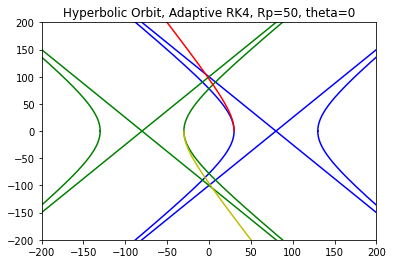

In [18]:
import matplotlib.pyplot as plt
t= np.linspace(-math.pi,math.pi,100000)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
plt.title("Hyperbolic Orbit, Adaptive RK4, Rp="+str(rad0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(hyperbfns.getxtheory(theta0,ecc0,rad0,t,1),hyperbfns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(hyperbfns.getxtheory(theta0,ecc0,rad0,t,-1),hyperbfns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

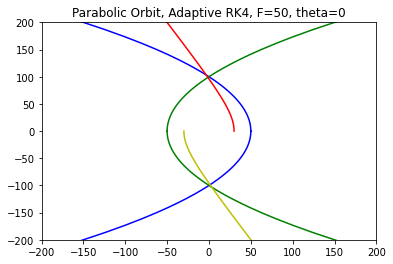

In [19]:
import matplotlib.pyplot as plt
t= np.linspace(0,2*math.pi,100)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
plt.title("Parabolic Orbit, Adaptive RK4, F="+str(rad0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(parabfns.getxtheory(theta0,ecc0,rad0,t,1),parabfns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(parabfns.getxtheory(theta0,ecc0,rad0,t,-1),parabfns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

Adaptive RK4 orbits run and superficially look correct. 

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2
oneellipse=int(len(npdt))
plt.ylim(-200,200)
plt.xlim(-200,200)
#plt.ylim(-1,1)
#plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-1,1)
plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'*y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-10,10)
plt.xlim(-25,-20)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'*y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
nperr

In [ ]:


plt.xlabel("timestep")
plt.ylabel("Rel err: 1/30 *|x2-x1|*(h'/h)^5")
plt.title("Relative error, RK4")
relerrplt,=plt.plot(np.arange(2,oneellipse),nperr[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))
plt.legend(handles=[relerrplt])
plt.show()

This curve should be constant and about equal to delta

In [ ]:


plt.xlabel("timestep number")
plt.ylabel("timestep size")
plt.title("Evolution of timestep with step")
relerrplt,=plt.plot(np.arange(2,oneellipse),npdt[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))

plt.show()

For appropriately set tolerances, adaptive timestep no longer has feedback issues. Tol=delta=0.0005 or less. The important thing is that this curve is smooth and has no constant regions where the value is pinned to either the maximum or minimum. We also seek reasonable starting values for the timestep. 

In [ ]:
plt.xlabel("x")
plt.ylabel("relative error")
plt.title("horizontal position vs relative error")
plt.plot(npstar1x[2:oneellipse,0], nperr[2:oneellipse],'b')
plt.show()

In [ ]:
plt.xlabel("y")
plt.ylabel("rel error")
plt.title("y vs rel error")
plt.plot(npstar1x[2:oneellipse,1],nperr[2:oneellipse])
plt.show()

In [ ]:
plt.xlabel("r")
plt.ylabel("rel error")
plt.title("r vs rel error")
rstar1x=np.sqrt(npstar1x[:,0]**2+npstar1x[:,1]**2)
plt.plot(rstar1x[2:oneellipse],nperr[2:oneellipse],'*b')
plt.show()

In [ ]:
plt.xlabel("t")
plt.ylabel("r")
plt.title("r vs t")
plt.plot(nptimes[2:oneellipse], rstar1x[2:oneellipse], '*b')
plt.show()

In [ ]:
thetaellipse = np.arctan2(npstar1x[2:oneellipse,1],npstar1x[2:oneellipse,0])

In [ ]:
plt.xlabel("t")
plt.ylabel("theta")
plt.title("theta vs t")
plt.plot(nptimes[2:oneellipse],thetaellipse,'b')
plt.show()

In [ ]:
plt.xlabel("theta")
plt.ylabel("rel error")
plt.title("rel error vs theta")
plt.plot(thetaellipse, nperr[2:oneellipse],'*b')
plt.show()


# Conservation of angular momentum

In [ ]:
import Lstability

In [ ]:
deltaL, Lavg=Lstability.Lstability(npstar1x,npstar2x,mass0)
deltaL, Lavg

In [ ]:
deltaL*Lavg

Orbit conserves angular momentum to a tolerance of deltaL. 

# Conservation of Energy

In [ ]:
import Estability

In [ ]:
deltaE, Eavg = Estability.Estability(npstar1x, npstar2x, mass0)
deltaE, Eavg

In [ ]:
deltaE*Eavg

Orbit conserves energy to a relative error of deltaE. 

# Symmetry of the two stars orbits with respect to eachother 

In [ ]:
import orbitSymmetricTol

In [ ]:
allcancelsx, allcancelsa=orbitSymmetricTol.howSymmetric(npstar1x,npstar2x,npstar1a,npstar2a)

In [ ]:
allcancelsx

Orbit is symmetric with respect to x and v up to a tolerance of allcancelsx

In [ ]:
allcancelsa

In [ ]:
npstar1x

Orbit is symmetric with respect to a to up to or better than a tolerance of allcancelsa

# Testing for precision in perihelion and aphelion recovery from knowledge of the initial angle

In [ ]:
import aeTest

In [ ]:
from matplotlib import pyplot as plt
plt.plot( np.abs(npstar1x[:,1]))

In [ ]:
def findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion):
    maxindex=len(npstar1x[:,1])
    apindex=np.argmin(np.abs(npstar1x[10:int(maxindex/2),1]))+1
    print(apindex)
    delta=math.floor(.2*apindex)
    print(delta)
    perindex=np.argmin(np.abs(npstar1x[delta:apindex-delta,1]))+delta
    print(perindex)
    print(apindex/perindex)
    if np.abs(apindex/perindex-2.)>0.05: 
        perindex=np.argmin(np.abs(npstar1x[apindex+delta:2*apindex+delta,1]))+delta+apindex
        print(perindex)
        apindex,perindex=perindex,apindex
        print(apindex,perindex)
        print(apindex/perindex)
    #apindex3=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    #apindex4=np.argmin(np.abs(npstar1x[100:apindex3-100,1]))+100
    #perindex=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    if useperihelion:
        apindex,perindex=perindex,apindex
    coordap=[npstar1x[apindex,0],npstar1x[apindex,1]]
    coordper=[npstar1x[perindex,0],npstar1x[perindex,1]]
    ra=np.sqrt(np.sum(np.array(coordap)**2))
    rp=np.sqrt(np.sum(np.array(coordper)**2))
    e=(ra-rp)/(ra+rp)
    a=1./2.*(ra+rp)
    deltae=np.abs(e-ecc0)/ecc0
    deltaa=np.abs(a-rad0)/rad0
    return apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
if theta0==0:
    apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa=findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion)

In [ ]:
if theta0!=0:
    perindex,apindex,coordper,coordap,rp,ra,e,a,deltae,deltaa=aeTest.findPerApHelion(npstar1x,theta0,ecc0,rad0)

Recovered perihelion radius given by r_per, recovered aphelion radius given by r_ap, a is semimajor axis computed from the orbit, e is eccentricty computed from the orbit, delta a is relative error on the semimajor axis, and delta e is eccenticity relative error. 

In [ ]:
apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
plt.plot(nptimes[:perindex],npstar1x[:perindex,1])

# Fit t as a function of the eccentric anomoly (angle from the center of the elipse)

In [ ]:
def findEccentricAnomoly(coordap, coordper):
    Ecenter=np.array(coordap)+np.array(coordper)
    Ecenter/=2.
    return Ecenter


In [ ]:
ellipsecenter=findEccentricAnomoly(coordap,coordper)

In [ ]:
ellipsecenter

In [ ]:
def getEllipsecenter(ecc,rad,theta, useperihelion):
    #ind of use perihelion
    rp=rad*(1-ecc)
    ra=-rad*(1+ecc)
    rcent=(rp+ra)/2
    #print(rp,ra,rcent)
    rcentx=rcent*np.cos(theta)
    rcenty=rcent* np.sin(theta)
    return [rcentx,rcenty]

In [ ]:
(np.array(coordap)+np.array(coordper))/2

In [ ]:
getEllipsecenter(ecc0,rad0,theta0, True)

In [ ]:
np.arctan2(-1.,0)/math.pi*180

In [ ]:
def getEang(npstar2x,ecc,rad,theta, useperihelion):
    ellipsecenter=getEllipsecenter(ecc,rad,theta, useperihelion)
    #print(ellipsecenter)
    #print(npstar1x)
    #print(npstar1x[:,0])
    xfortan=npstar2x[:,0]-ellipsecenter[0]
    yfortan=npstar2x[:,1]-ellipsecenter[1]
    #print("xy",xfortan,yfortan)
    Eang=np.arctan2(yfortan,xfortan)
    Eangtheta=2*np.arctan2(np.sqrt(1-ecc)*np.sin(theta/2.),np.sqrt(1+ecc)*np.cos(theta/2.))
    Eang-=Eangtheta
    #if useperihelion:
    #    Eang-=math.pi
    print(len(Eang))
    for i in np.arange(len(Eang)):
        #if xfortan[i]<0:
        #    Eang[i]+=math.pi
        if Eang[i]<0:
            Eang[i]+=2*math.pi
    print(xfortan,yfortan,Eang/math.pi*180)
    print("Eang",Eang)
    return xfortan, yfortan,Eang

In [ ]:
np.arctan2(-6.69327422*10**-6, -0.02240526)

In [ ]:
def xofeccanom(rad,Eang,ecc):
    return rad*(np.cos(Eang)+ecc)

In [ ]:
def yofeccanom(rad, Eang, ecc):
    b=getsemiminor(rad,ecc)
    return b*np.sin(Eang) 

In [ ]:
def tofEccAnom(npstar2x, rad,ecc,theta,mass, useperihelion):
    xE0,yE0,Eang=getEang(npstar2x,ecc,rad,theta, useperihelion)
    b=getsemiminor(rad,ecc)
    #fitval=rad*b*(Eang-ecc*np.sin(Eang))
    sgn=-1
    if useperihelion:
        sgn*=-1
    # added a factor of 2 in front of fitval
    fitval=rad**(1.5)*mass**(-.5)*(Eang-sgn*ecc*np.sin(Eang))
    fitval*=2
    print(Eang, ecc,rad,mass,fitval)
    return fitval

In [ ]:
def residualtEang(pars,nptimes,npstar2x):
    residual=np.abs(nptimes-tofEccAnom(npstar2x,pars['rad'],pars['ecc'],pars['theta'],pars['mass'],pars['useperihelion']))
    #print(nptimes, residual)
    return residual

In [ ]:
endindex=apindex
if useperihelion:
    endindex=perindex

In [ ]:
endindex

In [ ]:
xE0,yE0,Eang0=getEang(npstar2x[0:endindex-1,:],ecc0,rad0,theta0, useperihelion)

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
plt.plot(Eang0, xE0)

In [ ]:
plt.plot(Eang0, yE0)

In [ ]:
plt.plot(xE0,yE0)

In [ ]:
plt.plot(nptimesoneorbit,xE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0/xE0)

In [ ]:
np.arctan(0./1.)

In [ ]:
yE0[0]

In [ ]:
xE0[0]

In [ ]:
plt.plot(nptimesoneorbit,np.arctan2(yE0,xE0)*180/math.pi)

In [ ]:
Eangtest=tofEccAnom(npstar2x[0:endindex-1,:],rad0,ecc0,theta0,masses[0], useperihelion)

In [ ]:
np.max(Eangtest)

In [ ]:
nptimes[0]

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
tpredoneorbit=Eangtest[0:endindex-1]

In [ ]:
Eangoneorbit=Eang0[0:endindex-1]

In [ ]:
plt.plot(nptimesoneorbit,npstar2x[0:endindex-1,1])

In [ ]:
plt.plot(nptimesoneorbit,Eangoneorbit/math.pi*180)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit, label='times')
plt.xlabel("T timesteps")
plt.ylabel("T computed from angle")
plt.title("Times using start parameters")
plt.show()
plt.plot(nptimesoneorbit,tpredoneorbit-nptimesoneorbit, label='residual')
plt.legend()
plt.show()


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.scatter(nptimesoneorbit,tpredoneorbit)

In [ ]:
from lmfit import Minimizer,Parameters
pfittEang = Parameters()
pfittEang.add(name='theta', value=theta0, min=theta0-math.pi, max=theta0+math.pi, vary=True)
pfittEang.add(name='rad', value=rad0, min=0, vary=True)
pfittEang.add(name='ecc', value=ecc0, min=0, max=1.0, vary=True)
pfittEang.add(name='mass', value=masses[0], vary=False)
pfittEang.add(name='useperihelion', value=True, vary=False)

minit = Minimizer(residualtEang, pfittEang, fcn_args=(nptimesoneorbit,npstar2x[:endindex-1,:]))

outt = minit.leastsq()

In [ ]:
outt

Semimajor axis fit is good to about .1 percent at an eccentricity of 0.5. rad=49.886512 for delta=0.0001. rad=49.8863857 for delta = 0.0005. ecc = 0.51764747 for delta = 0.0001. ecc = 0.51765166 for delta = 0.0005. so both ecc and rad improve with a smaller delta, but not quickly. The program runs very slowly for large delta and requires 500000 timesteps for delta=0.0001. 

In [ ]:
tfinal=nptimesoneorbit[endindex-2]
tfinal

In [ ]:
from scipy.fft import fft

In [ ]:
from scipy.signal import blackman
wndow=blackman(len(nptimesoneorbit))

In [ ]:
ftresiduals=fft(nptimesoneorbit-tpredoneorbit)

In [ ]:
xf = np.linspace(0.0, 1.0/(2.0*dt), len(nptimesoneorbit)//2)

In [ ]:
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:len(nptimesoneorbit)//2]), '-b')

In [ ]:
ftr=fft(np.sqrt(npstar1x[:endindex-1,0]**2+npstar1x[:endindex-1,1]**2))

In [ ]:
plt.xlabel("frequency")
plt.ylabel("Fourier transform of t(E)")
plt.title("Fourier transform of time computed from eccentric anomaly")
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftr[1:len(nptimesoneorbit)//2]), '-b')

This is the fourier transform of the triangle wave.

In [ ]:
plt.title("Fourier transform of residuals of times")
plt.xlabel("frequency")
plt.ylabel("FT(t(E))")
plt.semilogy(xf[1:50], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:50]), '-b')

In [ ]:
plt.xlabel("bin number")
plt.ylabel("FT(t(E))")
plt.title("Fourier transform of residuals of times")
plt.semilogy(np.arange(1,30), 2.0/len(nptimesoneorbit[:29]) * np.abs(ftresiduals[1:30]), '*b')

Peak at the second harmonic and the sixth harmonic. The second harmonic seems natural due to the symmetry of the orbit but the sixth harmonic is harder to explain. 

Implementing the Adaptive RK4 hasn't changed the fit, residuals, or harmonics, sadly. There is still a 2% error in the fit for an eccentricity of 0.5